# Stock Market Analysis for Tech Stocks

`Trying to analyse data from stock market for some technology stocks`

I am using Pandas to extract and analyse the information, visualise it, and look at different ways to analyse risk of a stock, based on its performance history.

`Here are the questions I am trying to answer:`

1. What was change in a stock's price over time?
2. What was daily return average of a stock?
3. What was moving average of various stocks?
4. What was correlation between daily returns of different stocks?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behaviour?

In [200]:
from __future__ import division # for float division

import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#To grab stock data
from pandas_datareader import DataReader
from datetime import datetime as dt


In [201]:
#We're going to analyse stock info for Apple, Google, Microsoft, and Amazon

tech_list = ['AAPL','GOOGL','MSFT','AMZN']


In [202]:
#Setting the end date to today
end = dt.now()

#Start date set to 1 year back
start = dt(end.year-1,end.month,end.day)

In [203]:
#Using Yahoo Finance to grab the stock data (`YahooDailyReader`)
# Requires connection

for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end) 

* Globals method sets the stock name to a global variable
* Globals method => Apple's stock data will be stored in the AAPL global variable dataframe. Let's see if that worked

`NOTE`
* We have Date Column as index so we are geting Keyerror Date

In [204]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-19,89.139999,86.287498,88.660004,87.430000,264476000.0,86.844833
2020-06-22,89.864998,87.787498,87.834999,89.717499,135445200.0,89.117027
2020-06-23,93.095001,90.567497,91.000000,91.632500,212155600.0,91.019203
2020-06-24,92.197502,89.629997,91.250000,90.014999,192623200.0,89.412537
2020-06-25,91.250000,89.392502,90.175003,91.209999,137522400.0,90.599533


In [205]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,121.835169,118.765972,120.407054,120.315674,1.235016e+08,119.931846
std,12.328402,12.185375,12.368063,12.245725,5.385768e+07,12.367125
min,89.139999,86.287498,87.834999,87.430000,4.669130e+07,86.844833
25%,116.330002,113.423752,114.965002,115.032501,8.809662e+07,114.468609
50%,124.090000,120.810001,122.599998,122.475002,1.096457e+08,122.174603
75%,130.404999,127.017500,128.807499,128.927502,1.501640e+08,128.430431
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.704010


* Apple last year min, max, average can be seen

In [206]:
AAPL.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

* No null valu foud

In [207]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-06-19 to 2021-06-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


* Data type neads no change

## Change in Stock Price Over Time

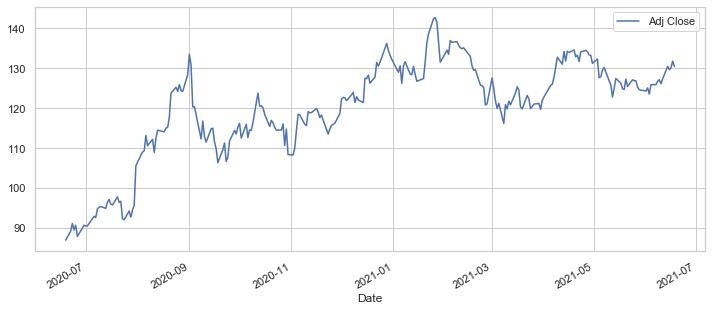

In [208]:
# stock's adjusted closing price

AAPL['Adj Close'].plot(legend=True,figsize=(12,5))

plt.show()

## Stock's volume being traded, over time

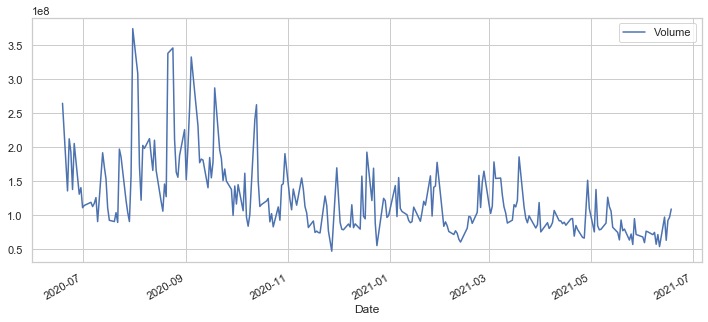

In [209]:
AAPL['Volume'].plot(legend=True,figsize=(12,5))

plt.show()


## Moving average of various stocks in past?
* 10days
* 20days
* 40days

In [210]:
AAPL_c = AAPL.copy()

In [211]:
day = [20,40,60]

for movingavg in day:
    col_name = 'moving_avg for %s days' %(str(movingavg))
    AAPL_c[col_name] = AAPL_c['Adj Close'].rolling(window = movingavg,center=False).mean()

* Some Rolling window calculations
* We take a window size of k at a time and perform some desired mathematical operation on it

In [212]:
AAPL_c.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'moving_avg for 20 days', 'moving_avg for 40 days',
       'moving_avg for 60 days'],
      dtype='object')

In [213]:
AAPL_c.isnull().sum()

High                       0
Low                        0
Open                       0
Close                      0
Volume                     0
Adj Close                  0
moving_avg for 20 days    19
moving_avg for 40 days    39
moving_avg for 60 days    59
dtype: int64

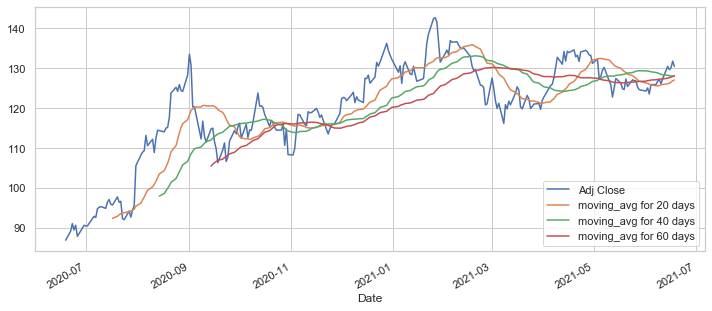

In [214]:
AAPL_c[['Adj Close','moving_avg for 20 days','moving_avg for 40 days',
      'moving_avg for 60 days']].plot(subplots=False,figsize=(12,5))

plt.show()

* Moving averages for more days have a smoother plot, as they're less reliable on daily fluctuations.
* So even though, Apple's stock has a slight dip near the start of May-2021, it's generally been on an upward trend since mid-Aug-2020.

## Daily return average of a stock?
* Percentage change over the adjusted closing price

In [215]:
AAPL['daily_return'] = AAPL['Adj Close'].pct_change()

In [216]:
AAPL['daily_return'].isnull().sum()

1

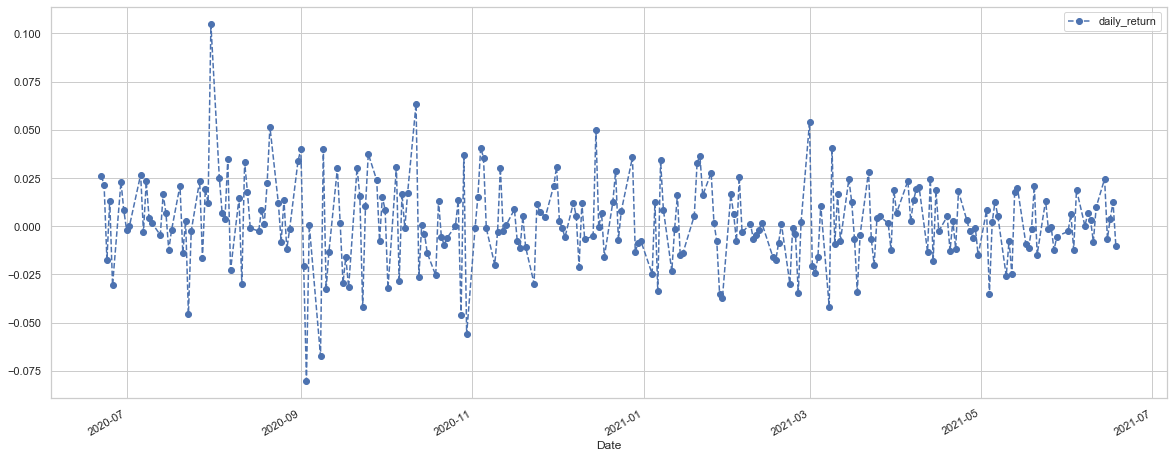

In [217]:
AAPL['daily_return'].plot(figsize=(20,8),legend=True,linestyle='--',marker='o')

plt.show()

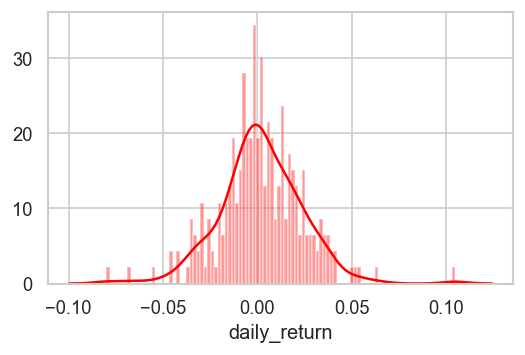

In [218]:
plt.figure(figsize=(5,3),dpi=120)

sns.distplot(AAPL['daily_return'].dropna(),bins=100,color='red')

plt.show()

* Positive daily returns seem to be slightly more frequent than negative returns for Apple

## Correlation between daily returns of different stocks?

In [219]:
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

In [220]:
# Only 'Adj Close'
adjclose_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

# Requires connection

In [221]:
adjclose_df.head()

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2020-06-19,86.844833,1424.640015,193.278564,2675.010010
2020-06-22,89.117027,1450.660034,198.646606,2713.820068
2020-06-23,91.019203,1463.979980,199.973740,2764.409912
2020-06-24,89.412537,1432.699951,195.942780,2734.399902
2020-06-25,90.599533,1441.099976,198.418793,2754.580078


In [222]:
adjclose_df.isnull().sum()

Symbols
AAPL     0
GOOGL    0
MSFT     0
AMZN     0
dtype: int64

In [223]:
df = adjclose_df.pct_change()
df.tail()

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2021-06-14,0.024578,0.007699,0.007755,0.011067
2021-06-15,-0.006438,-0.008379,-0.005887,-0.000219
2021-06-16,0.003934,-0.005329,-0.003793,0.009494
2021-06-17,0.012601,0.008040,0.013676,0.021665
2021-06-18,-0.010092,-0.013409,-0.005634,-0.000671


In [224]:
df.isnull().sum()

Symbols
AAPL     1
GOOGL    1
MSFT     1
AMZN     1
dtype: int64

* Scatterplot to visualise any correlations between different stocks. 
* First we'll visualise a scatterplot for the relationship between the daily return of a stock to itself.

<Figure size 480x360 with 0 Axes>

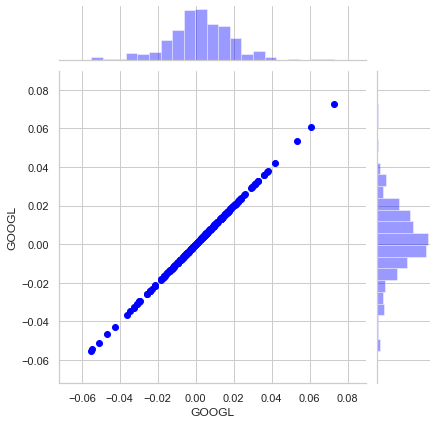

In [225]:
plt.figure(figsize=(4,3),dpi=120)

sns.jointplot('GOOGL','GOOGL',df,kind='scatter',color='blue')

plt.show()

* Relationship is perfectly linear because we're trying to correlate something with itself.
* Now check out the relationship between Google and Apple's daily returns

<Figure size 480x360 with 0 Axes>

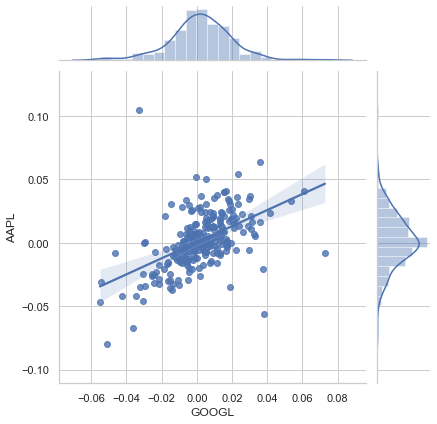

In [226]:
plt.figure(figsize=(4,3),dpi=120)

sns.jointplot('GOOGL','AAPL',df,kind='reg')

plt.show()

* Minor correlation between two stocks

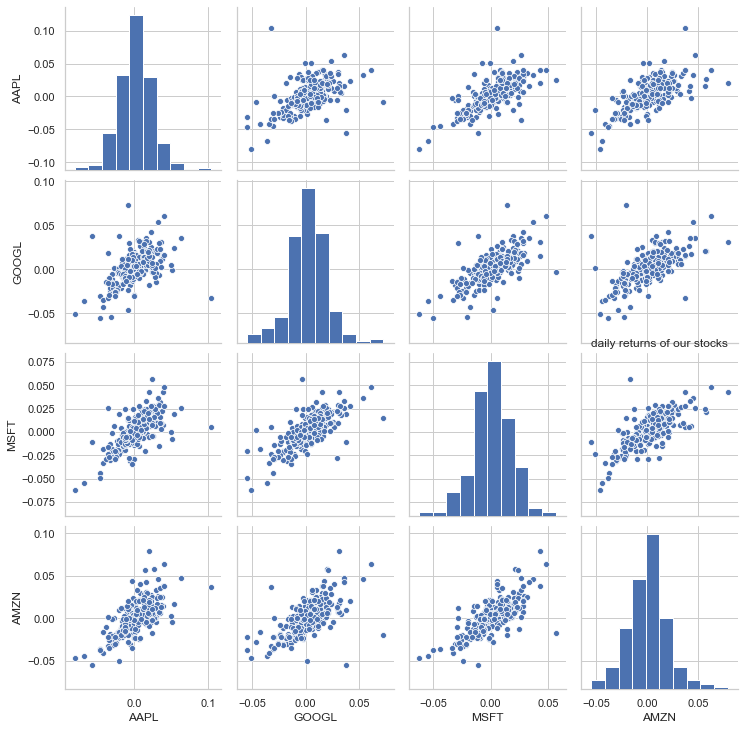

In [227]:
# all other combinations

sns.pairplot(df.dropna())

plt.title('daily returns of our stocks')
plt.show()

* More clean way will be to use correalation plot

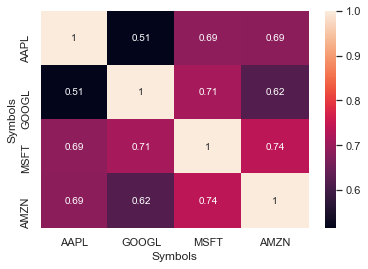

In [228]:
sns.heatmap(df.dropna().corr(),annot=True)

* Amazon and Microsoft have higher correlation
* Every company is +Vely correlated with each other


## How much value do we put at risk by investing in a particular stock?
* Basic way to quantify risk:
    * Compare expected return (which can be the mean of the stock's daily returns) with the standard deviation of the daily returns.

In [229]:
rets = df.dropna()

In [ ]:
arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', color='red')

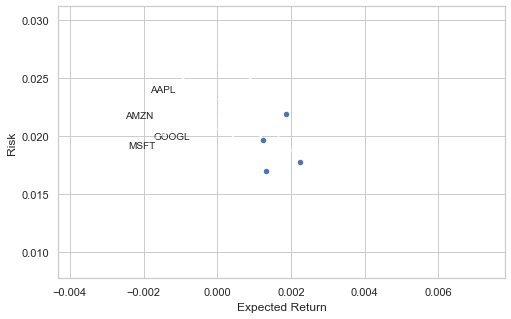

In [264]:
plt.figure(figsize=(8,5))

plt.scatter(rets.mean(),rets.std(),s=20)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(label,xy=(x,y),xytext=(-110,20),textcoords = 'offset points', ha = 'right',va = 'bottom',arrowprops = dict(arrowstyle='->',connectionstyle = "arc3, rad=-0.5"))

* Focus => stock to have a high expected return and a low risk
* Apple stocks have higher expected returns, but also have a higher risk

## Value At Risk

* Amount of money we could expect to lose for a given confidence interval. 
* We'll use the `Bootstrap` method and the `Monte Carlo Method` to extract this value.

**`Bootstrap Method`**

* Using this method, we calculate empirical quantiles from a histogram of daily returns. 
* Quantiles help us define our confidence interval.

[]

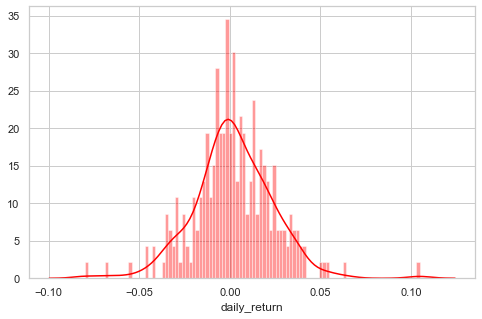

In [231]:
plt.figure(figsize=(8,5))

sns.distplot(AAPL['daily_return'].dropna(),bins=100,color='red')

plt.plot()

In [232]:
rets.head()

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2020-06-22,0.026164,0.018264,0.027774,0.014508
2020-06-23,0.021345,0.009182,0.006681,0.018642
2020-06-24,-0.017652,-0.021366,-0.020157,-0.010856
2020-06-25,0.013276,0.005863,0.012636,0.007380
2020-06-26,-0.030726,-0.054514,-0.020016,-0.022403


In [233]:
rets['AAPL'].quantile(0.05)

-0.03315361479370249

* 0.05 empirical quantile of daily returns is at -0.033
* This means that with 95% confidence, worst daily loss will not exceed 3.31% (of the investment).

## How can we attempt to predict future stock behaviour?

**`Monte Carlo Method`**
* In this method, we run simulations to predict future many times, and aggregate results in end for some quantifiable value.

In [234]:
days = 365

#delta t
dt = 1/365

mu = rets.mean()['GOOGL']

sigma = rets.std()['GOOGL']

In [235]:
#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

* We're going to run simulation of Google stocks. Let's check out the opening value of the stock.

In [237]:
GOOGL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-19,1444.500000,1419.000000,1440.000000,1424.640015,2639200,1424.640015
2020-06-22,1450.949951,1419.189941,1425.010010,1450.660034,1472100,1450.660034
2020-06-23,1475.199951,1445.000000,1452.000000,1463.979980,1887600,1463.979980
2020-06-24,1475.790039,1430.000000,1463.280029,1432.699951,1579600,1432.699951
2020-06-25,1442.319946,1419.540039,1431.219971,1441.099976,1197900,1441.099976



* Let's do a simulation of 100 runs, and plot them

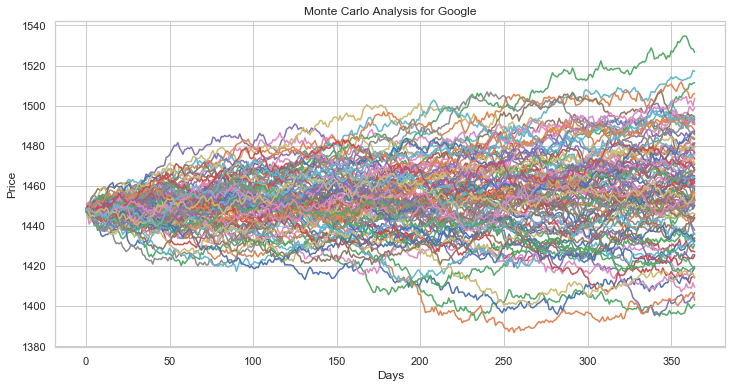

In [238]:
start_price = 1447.800049 #Taken from above

plt.figure(figsize=(12,6))

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

plt.show()

In [239]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

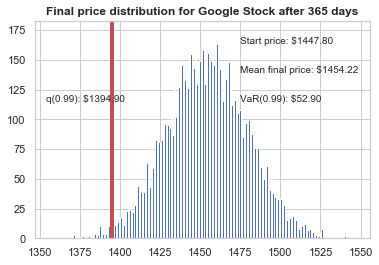

In [240]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold')

`OBSERVATION`
* We can infer from this that, Google's stock is pretty stable. The starting price that we had was USD1447.800049, and average final price over 10,000 runs was USD1454.27.

* Red line indicates the value of stock at risk at the desired confidence interval. For every stock, we'd be risking USD53.77, 99% of time.